# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 19.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
65243,0.7446,0.2075,0.3076,0.1245,0.0269,0.0293,0.1904,0.6055,0.2173,2.7222,8,8,8,8
297880,0.1367,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0171,0.0024,0.0024,0,0,0,0
84929,0.8447,0.1514,0.0024,0.0024,0.0024,0.0024,0.0024,0.0415,0.0024,0.0024,1,0,11,0
440790,2.1118,0.4858,0.7178,1.0278,0.4028,0.0830,0.5713,0.9644,0.7275,1.0107,5,5,21,21
48110,0.0391,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467289 entries, 0 to 467288
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          467289 non-null  float64
 1   Emg2          467289 non-null  float64
 2   Emg3          467289 non-null  float64
 3   Emg4          467289 non-null  float64
 4   Emg5          467289 non-null  float64
 5   Emg6          467289 non-null  float64
 6   Emg7          467289 non-null  float64
 7   Emg8          467289 non-null  float64
 8   Emg9          467289 non-null  float64
 9   Emg10         467289 non-null  float64
 10  repetition    467289 non-null  int64  
 11  rerepetition  467289 non-null  int64  
 12  stimulus      467289 non-null  int64  
 13  restimulus    467289 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.9 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000
mean,0.453055,0.139742,0.094868,0.055296,0.016373,0.008648,0.103495,0.283430,0.048519,0.198897,3.162582,2.379900,5.604711,4.253644
std,0.482096,0.205522,0.222762,0.168492,0.067662,0.027839,0.267785,0.441489,0.142963,0.471025,3.483738,3.311147,6.578120,6.243255
min,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.085400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.017100,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.336900,0.063500,0.002400,0.002400,0.002400,0.002400,0.019500,0.119600,0.002400,0.007300,2.000000,0.000000,3.000000,0.000000
75%,0.642100,0.185500,0.068400,0.007300,0.002400,0.002400,0.102500,0.397900,0.009800,0.188000,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.416500,4.660600,3.276400,2.189900,0.744600,4.665500,4.668000,2.314500,4.665500,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     198607
8      15551
2      15541
7      15533
12     15532
4      15521
6      15515
9      15500
5      15490
11     15489
10     15466
1      15465
3      15447
14     10373
17     10359
13     10347
15     10313
16     10299
19      5181
18      5180
21      5172
22      5139
20      5135
23      5134
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.912495,-0.471088,-0.454625,-0.343186,-0.225479,-0.245089,0.089595,0.282475,-0.353103,0.061963
1,-0.917420,-0.504920,-0.444173,-0.343186,-0.225479,-0.245089,0.072987,0.287577,-0.353103,0.071632
2,-0.917420,-0.504920,-0.454625,-0.343186,-0.225479,-0.245089,0.056034,0.323923,-0.353103,0.110107
3,-0.912495,-0.515892,-0.454625,-0.343186,-0.225479,-0.245089,0.030776,0.344753,-0.353103,0.158449
4,-0.893191,-0.460116,-0.454625,-0.343186,-0.225479,-0.245089,0.106549,0.515858,-0.353103,0.211329
...,...,...,...,...,...,...,...,...,...,...
392464,-0.585508,1.091552,-0.403620,-0.249204,-0.225479,-0.082942,0.689556,0.225299,-0.210604,-0.111474
392465,-0.575856,1.269852,-0.342162,-0.168412,-0.191471,-0.000213,0.790934,0.318822,-0.084298,-0.034325
392466,-0.566204,1.370432,-0.311642,-0.141482,-0.225479,-0.000213,0.875357,0.531587,0.058202,0.009084
392467,-0.508489,1.705088,-0.281123,-0.101361,-0.225479,0.079206,0.883661,0.656142,0.247985,0.071632


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 3s 28ms/step - loss: 1.4890 - accuracy: 0.6206 - val_loss: 1.1354 - val_accuracy: 0.6993
Epoch 2/100
78/78 [==============================] - 2s 26ms/step - loss: 1.0398 - accuracy: 0.7213 - val_loss: 0.9563 - val_accuracy: 0.7413
Epoch 3/100
78/78 [==============================] - 2s 26ms/step - loss: 0.9234 - accuracy: 0.7496 - val_loss: 0.8811 - val_accuracy: 0.7592
Epoch 4/100
78/78 [==============================] - 2s 26ms/step - loss: 0.8573 - accuracy: 0.7649 - val_loss: 0.8308 - val_accuracy: 0.7716
Epoch 5/100
78/78 [==============================] - 2s 26ms/step - loss: 0.8128 - accuracy: 0.7752 - val_loss: 0.7934 - val_accuracy: 0.7783
Epoch 6/100
78/78 [==============================] - 2s 26ms/step - loss: 0.7777 - accuracy: 0.7834 - val_loss: 0.7658 - val_accuracy: 0.7868
Epoch 7/100
78/78 [==============================] - 2s 26ms/step - loss: 0.7521 - accuracy: 0.7902 - val_loss: 0.7480 - val_accuracy: 0.7919
Epoch 

78/78 [==============================] - 2s 27ms/step - loss: 0.3878 - accuracy: 0.8873 - val_loss: 0.4512 - val_accuracy: 0.8720
Epoch 59/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3904 - accuracy: 0.8871 - val_loss: 0.4535 - val_accuracy: 0.8713
Epoch 60/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3854 - accuracy: 0.8888 - val_loss: 0.4489 - val_accuracy: 0.8730
Epoch 61/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3796 - accuracy: 0.8901 - val_loss: 0.4454 - val_accuracy: 0.8735
Epoch 62/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3811 - accuracy: 0.8895 - val_loss: 0.4502 - val_accuracy: 0.8718
Epoch 63/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3787 - accuracy: 0.8899 - val_loss: 0.4473 - val_accuracy: 0.8731
Epoch 64/100
78/78 [==============================] - 2s 27ms/step - loss: 0.3757 - accuracy: 0.8907 - val_loss: 0.4511 - val_accuracy: 0.8728
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

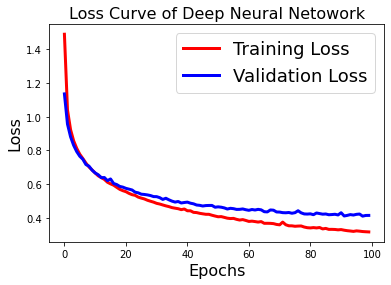

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

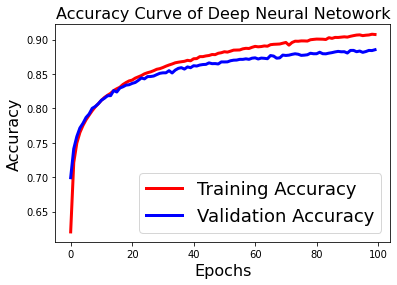

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([0, 0, 4, ..., 1, 0, 5], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 88.52651158050297


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     38861
           1       0.89      0.78      0.83      2127
           2       0.82      0.79      0.80      2247
           3       0.94      0.77      0.84      2170
           4       0.93      0.85      0.89      2553
           5       0.88      0.85      0.86      2318
           6       0.93      0.85      0.88      2306
           7       0.80      0.78      0.79      2252
           8       0.85      0.82      0.83      2359
           9       0.84      0.67      0.75      1982
          10       0.84      0.67      0.75      2255
          11       0.83      0.85      0.84      2176
          12       0.87      0.77      0.82      2247
          13       0.94      0.84      0.89      1512
          14       0.86      0.78      0.81      1552
          15       0.83      0.82      0.83      1473
          16       0.91      0.82      0.86      1691
 

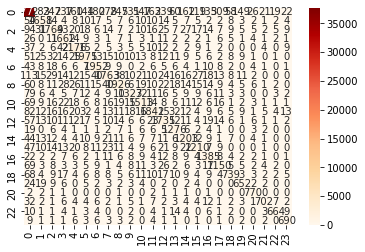

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9452314826610951
MSE: 11.060221163401025
RMSE: 3.325691080572732


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.8848698401238402
Recall Score :  0.8852651158050296
f1_score :  0.8828923248337008
